# What is Naive Bayes Classifier

Naive Bayes Classifiers are a group of algorithms that use Bayes' Theorem as the basis of classification. All the algorithms share a common principle that every pair of features being classified are independent of each other.

In [1]:
#impoting all the basic libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the datasets into Dataframes

In [2]:
#Loading the test and training dataset, encoding is used to eliminate UTF-8 error code
train=pd.read_csv("Corona_NLP_train.csv", encoding = 'ISO-8859-1')
test=pd.read_csv("Corona_NLP_test.csv" , encoding = 'ISO-8859-1')

## Preprocessing the Data

In [3]:
#Checking for datatypes for preprocessing
train.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [4]:
#This snippet removes the symbols and special characters form the tweets
reg_ex = re.compile("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
train_tweets = []
test_tweets=[]

for tweet in train['OriginalTweet']:
    train_tweets.append(reg_ex.sub(" ", tweet))
train['OriginalTweet']=train_tweets

for tweet in test['OriginalTweet']:
    test_tweets.append(reg_ex.sub(" ", tweet))
test['OriginalTweet']=test_tweets


In [6]:
#Checking for null values
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [7]:
train['Location'].value_counts()

London                                     540
United States                              528
London, England                            520
New York, NY                               395
Washington, DC                             373
United Kingdom                             337
Los Angeles, CA                            281
India                                      268
UK                                         232
Australia                                  225
USA                                        223
England, United Kingdom                    191
Canada                                     191
Toronto, Ontario                           160
Global                                     159
Chicago, IL                                155
California, USA                            153
San Francisco, CA                          152
Boston, MA                                 150
New York, USA                              140
New Delhi, India                           138
Atlanta, GA  

In [8]:
# Dropping 'Location' because of too many null values
train=train.drop('Location', axis=1)

In [9]:
train.isnull().sum()

UserName         0
ScreenName       0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [10]:
test.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [11]:
test['Location'].value_counts()

United States                                    75
London, England                                  48
Washington, DC                                   38
New York, NY                                     34
Los Angeles, CA                                  33
Canada                                           29
Toronto, Ontario                                 29
California, USA                                  26
London                                           25
Toronto                                          21
USA                                              20
San Francisco, CA                                19
Atlanta, GA                                      19
United Kingdom                                   18
Ireland                                          17
Texas, USA                                       17
Los Angeles                                      16
New York, USA                                    16
India                                            15
Chicago, IL 

In [12]:
# Dropping 'Location' because of too many null values
test=test.drop('Location', axis=1)

In [13]:
test.isnull().sum()

UserName         0
ScreenName       0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

## Creating our Model

In [14]:
# Creating a vocabulary and extracting Stopwords
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn import metrics
extractor=cv(stop_words='english')
features=extractor.fit_transform(train.OriginalTweet)
extractor.vocabulary_

{'gahan': 13305,
 'advice': 2213,
 'talk': 30498,
 'neighbours': 21214,
 'family': 12042,
 'exchange': 11672,
 'phone': 23324,
 'numbers': 21671,
 'create': 8317,
 'contact': 7766,
 'list': 18587,
 'schools': 27381,
 'employer': 11089,
 'chemist': 6602,
 'gp': 13980,
 'set': 27784,
 'online': 22046,
 'shopping': 28103,
 'accounts': 1944,
 'poss': 23904,
 'adequate': 2098,
 'supplies': 30131,
 'regular': 25656,
 'meds': 19736,
 'order': 22170,
 'coronavirus': 8008,
 'australia': 3661,
 'woolworths': 34048,
 'elderly': 10907,
 'disabled': 9784,
 'dedicated': 9057,
 'hours': 15414,
 'amid': 2787,
 'covid': 8195,
 '19': 432,
 'outbreak': 22295,
 'food': 12770,
 'stock': 29609,
 'don': 10208,
 'panic': 22654,
 'need': 21166,
 'stay': 29471,
 'calm': 5857,
 'safe': 26918,
 'ready': 25303,
 'supermarket': 30095,
 'paranoid': 22716,
 'litteraly': 18613,
 'thing': 31004,
 'causes': 6236,
 'shortage': 28116,
 'news': 21293,
 'region': 25636,
 'confirmed': 7604,
 'case': 6151,
 'came': 5878,
 'su

In [15]:
#Dividing, fitting ang transforming the useful data.
from sklearn.preprocessing import LabelEncoder as le
encoder=le()
X_train = extractor.fit_transform(train["OriginalTweet"])
X_test = extractor.transform(test["OriginalTweet"])

In [16]:
y_train = encoder.fit_transform(train["Sentiment"]) 
y_test = encoder.transform(test["Sentiment"])        

In [17]:
from sklearn.naive_bayes import MultinomialNB as mnb
classifier= mnb()
classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
y_pred=classifier.predict(X_test)
nr_correct=(y_test==y_pred).sum()

## Checking and Visualising the accuracy of ou model 

In [19]:
# checking of many of the total tweets were classified acccurately by our model
print(f'{nr_correct} tweets out of {y_test.size} tweets were classified correctly')

1721 tweets out of 3798 tweets were classified correctly


In [20]:
#Checking the accuracy score of our model
print(f'Accuracy score of our model : {classifier.score(X_test,y_test)}')

Accuracy score of our model : 0.4531332280147446


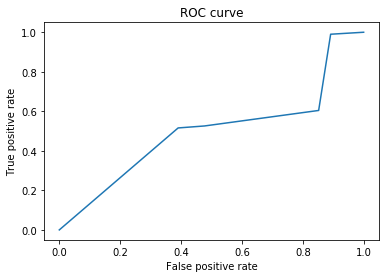

Multinomial Naive Bayes AUC: 0.4971146033218853


In [21]:
# Plotting the ROC Curve for a better visualization.
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
print("Multinomial Naive Bayes AUC: {0}".format(metrics.auc(fpr, tpr)))